In [3]:
from fhd import *
import OpenEphys
import matplotlib.pyplot as plt
import numpy as np
from kaveh.toolbox import find_files_regex
import pandas as pd
import os

In [41]:
%matplotlib notebook

In [42]:
# fname_behavioral = '../data/behavioral/2019_08_12/random_corrective_saccades_160452.fhd'
# fname_OE_x = '../data/OpenEphys_data/2019-08-12/2019-08-12_16-04-50/100_ADC2.continuous'
# fname_OE_y = '../data/OpenEphys_data/2019-08-12/2019-08-12_16-04-50/100_ADC1.continuous'
# messages_fname = '../data/OpenEphys_data/2019-08-12/2019-08-12_16-04-50/messages.events'
# events_file = '../data/OpenEphys_data/2019-08-12/2019-08-12_16-04-50/all_channels.events'
# f_name_csv = '../data/OpenEphys_data/2019-08-12/2019-08-12_16-04-50/channel_1.CS.csv'

# fname_behavioral = '../data/behavioral/2019_08_12/random_corrective_saccades_153356.fhd'
# fname_OE_x = '../data/OpenEphys_data/2019-08-12/2019-08-12_15-33-54/100_ADC2.continuous'
# fname_OE_y = '../data/OpenEphys_data/2019-08-12/2019-08-12_15-33-54/100_ADC1.continuous'
# messages_fname = '../data/OpenEphys_data/2019-08-12/2019-08-12_15-33-54/messages.events'
# events_file = '../data/OpenEphys_data/2019-08-12/2019-08-12_15-33-54/all_channels.events'
# f_name_csv = '../data/OpenEphys_data/2019-08-12/2019-08-12_15-33-54/channel_1.CS.csv'

# behavioral_source_dir = '../data/behavioral/'
# OE_source_dir = '../data/OpenEphys_data/'
# recording_date = '2019-09-12'

# sess_EL = '17-00-06'
# sess_OE = '17-00-00'

# fname_behavioral = os.path.join(behavioral_source_dir, recording_date.replace('-','_'), 'random_corrective_saccades_with_pause_' + sess_EL.replace('-','') + '.fhd')
# OE_source = os.path.join(OE_source_dir, recording_date, recording_date + '_' + sess_OE)

In [49]:
experiments_csv = '../data/tetrode-heptode-ephys_recording_notes - Sheet1.csv'

df = pd.read_csv(experiments_csv)
exp_info = df[['date','OE', 'EL', 'CH']].dropna()

sessions_info = []
behavioral_source_dir = '../data/behavioral/'
OE_source_dir = '../data/OpenEphys_data/'
fnames = []
for idx, (_, row) in enumerate(exp_info.iterrows()):
    recording_date = row['date']
    sess_EL = row['EL']
    sess_OE = row['OE']
    chan = row['CH']
    OE_source = os.path.join(OE_source_dir, recording_date, recording_date + '_' + sess_OE)
    behavioral_file  = find_files_regex(os.path.join(behavioral_source_dir, recording_date.replace('-','_')), r".*{}\.fhd$".format(sess_EL.replace('-','')))
    curr_sess = (chan,)
    if len(behavioral_file) == 1:
        fname_behavioral = behavioral_file[0]
        print(fname_behavioral)
        curr_sess = (fname_behavioral,) + curr_sess
    elif len(behavioral_file) > 1:
        raise ValueError('multiple behavioral files found for the same timestamp: {}'.format(behavioral_file))
    else:
        print('Behavioral file not found: {}'.format(sess_EL))
    if os.path.exists(OE_source):
        print(OE_source)
        curr_sess = (OE_source,) + curr_sess
    else:
        print('Open Ephys directory not found: {}'.format(OE_source))
    sessions_info = sessions_info + [curr_sess]
    print('-------------------')

In [55]:
print(fname_behavioral)
print(OE_source)

../data/behavioral/2019_09_12/random_corrective_saccades_with_pause_170006.fhd
../data/OpenEphys_data/2019-09-12/2019-09-12_17-00-00


In [40]:
fname_behavioral = '../data/behavioral/2019_09_12/random_corrective_saccades_with_pause_170006.fhd'
OE_source = '../data/OpenEphys_data/2019-09-12/2019-09-12_17-00-00'
chan_index = 1
fname_OE_x = os.path.join(OE_source,'100_ADC2.continuous')
fname_OE_y = os.path.join(OE_source,'100_ADC1.continuous')
messages_fname = os.path.join(OE_source, 'messages.events')
events_file = os.path.join(OE_source, 'all_channels.events')
f_name_csv = os.path.join(OE_source, 'channel_{}.CS.csv'.format(chan_index))

In [6]:
fhd_content = load(fname_behavioral)

HT = np.squeeze(fhd_content['target_x'])
VT = np.squeeze(fhd_content['target_y'])
HE = np.squeeze(fhd_content['right_horizontal_eye'])
VE = np.squeeze(fhd_content['right_vertical_eye'])
eye = np.linalg.norm(np.vstack((HE, VE)), axis = 0)
# target = np.linalg.norm(np.vstack((target_x, target_y)), axis = 0)
el_t = np.squeeze(fhd_content['t'])
trials = fhd_content['trials']

In [7]:
for k,v in zip(trials[4].keys(), trials[4].values()):
    print('{} : {}'.format(k,v))

# Loading state times from behavioral data
class trial_events:
    pass

trialevents = []
for trial in trials:
    trial_event = trial_events()
#     if not np.array_equal(trial['state_start_time_cue_target_present'], trial['state_start_time_detect_sac_start']):
#         print(trial['state_start_time_cue_target_present'], trial['state_start_time_detect_sac_start'])
    
    for k,v in zip(trial.keys(), trial.values()):
        exec('trial_event.' + k + '=v')
    trialevents.append(trial_event)

trial_start_time : [2618.07535081]
target_width : [0.48332274]
target_height : [0.48378435]
start_x : [0.]
start_y : [0.]
cue_x : [4.2426405]
cue_y : [4.2426405]
iss_x : [-2.47487378]
iss_y : [-2.47487378]
end_x : [1.76776695]
end_y : [1.76776695]
fixation_time : [0.2]
punishment_time : [2.]
iti : [0.2]
state_start_time_str_target_pursuit : [[2618.0725]]
state_start_time_str_target_present : [[2618.2761 2620.8474]]
state_start_time_str_target_fixation : [[2618.2761 2620.8474]]
state_start_time_cue_target_present : [[2618.4805 2621.1902]]
state_start_time_detect_sac_start : [[2618.4805 2621.1902]]
state_start_time_saccade : [[2621.389]]
state_start_time_detect_sac_end : [[2621.389]]
state_start_time_deliver_reward : [[2621.4143]]
state_start_time_end_target_fixation : [[2621.4143]]
state_start_time_iti : [[2621.6184]]
state_start_time_next_trial : [[2621.8225]]
trial_end_time : [2621.83038202]


In [8]:
str_target_fixation_times = [te.state_start_time_str_target_fixation for te in trialevents if hasattr(te, 'state_start_time_str_target_fixation')]
str_target_fixation_times = np.squeeze(np.hstack(str_target_fixation_times))

target_presentation_time = [te.state_start_time_cue_target_present for te in trialevents if hasattr(te, 'state_start_time_cue_target_present')]
target_presentation_time = np.squeeze(np.hstack(target_presentation_time))

iti_times = [te.state_start_time_iti for te in trialevents if hasattr(te, 'state_start_time_iti')]
iti_times = np.squeeze(np.hstack(iti_times))

target_pursuit_start_times =  [te.state_start_time_str_target_pursuit for te in trialevents if hasattr(te, 'state_start_time_str_target_pursuit')]
target_pursuit_start_times = np.squeeze(np.hstack(target_pursuit_start_times))

detect_sac_end_times =  [te.state_start_time_detect_sac_end for te in trialevents if hasattr(te, 'state_start_time_detect_sac_end')]
detect_sac_end_times = np.squeeze(np.hstack(detect_sac_end_times))

deliver_reward_times =  [te.state_start_time_deliver_reward for te in trialevents if hasattr(te, 'state_start_time_deliver_reward')]
deliver_reward_times = np.squeeze(np.hstack(deliver_reward_times))

In [7]:
# Zeroing the time on behavioral data and event times
detect_sac_end_times = detect_sac_end_times - el_t[0]
str_target_fixation_times = str_target_fixation_times - el_t[0]
target_presentation_time = target_presentation_time - el_t[0]
iti_times = iti_times - el_t[0]
target_pursuit_start_times = target_pursuit_start_times - el_t[0]
deliver_reward_times = deliver_reward_times - el_t[0]
el_t = el_t - el_t[0]

In [8]:
# Loading network event data from Open Ephys data
with open(messages_fname, 'r') as f:
    file_content = f.readlines()
Fs = float(file_content[1].split('@')[-1][0:-3])
time0 = int(file_content[1].split(' ')[0])
net_events_prim = np.array([[l.split(' ')[0], l.split(' ')[1][1:]] for l in file_content if len(l.split(' ')) == 2 and 'P' in l.split(' ')[-1]]).astype(np.int)
net_events_corr = np.array([[l.split(' ')[0], l.split(' ')[1][1:]] for l in file_content if len(l.split(' ')) == 2 and 'C' in l.split(' ')[-1]]).astype(np.int)
net_events_prim[:,0] = net_events_prim[:,0] - time0
net_events_corr[:,0] = net_events_corr[:,0] - time0
directions_prim, counts_prim = np.unique(net_events_prim[:,1], return_counts=True)
directions_corr, counts_corr = np.unique(net_events_corr[:,1], return_counts=True)

In [9]:
# Loading eye position from Open Ephys data
file_content = OpenEphys.load(fname_OE_x)
Fs = float(file_content['header']['sampleRate'])
eye_OE_x = file_content['data']
file_content = OpenEphys.load(fname_OE_y)
eye_OE_y = file_content['data']
time_stamps = file_content['timestamps']
voltage_t = np.interp(np.arange(eye_OE_x.size), np.arange(0, eye_OE_x.size, eye_OE_x.size/time_stamps.size), time_stamps)

Loading continuous data...
Loading continuous data...


In [10]:
# Load DIO events from Open Ephys data
event_number = 3 # which DIO event to sync to
events_content = OpenEphys.load(events_file)
event_t = events_content['timestamps']
eventId = events_content['eventId']
channelId = events_content['channel']

sync_events = event_t[np.where(np.logical_and(channelId == event_number,eventId == 1))] # eventId = 1: rising edge, eventId = 0: falling edge
sync_events = sync_events - voltage_t[0]
voltage_t = voltage_t - voltage_t[0]
voltage_t = voltage_t/Fs
sync_events = sync_events/Fs

loading events...


In [11]:
# Syncing behavioral time to open ephys time with DIO events
time_diff = sync_events[0] - str_target_fixation_times[0] # start fixation state corresponds to event_number = 3
print('DIO event time differeence = {}'.format(time_diff))
el_t_syncd_with_dio_event = el_t + time_diff

DIO event time differeence = 6.372389453125


In [12]:
# Syncing to Network events
time_diff = net_events_corr[0,0]/Fs - detect_sac_end_times[0] # detect_sac_end state corresponds to the network event for corrective saccade
print('Network event time differeence = {}'.format(time_diff))
el_t_syncd_with_network_event = el_t + time_diff
deliver_reward_times = deliver_reward_times + time_diff

Network event time differeence = 6.35314921875


In [9]:
# Assign the synchronized time stamps to the Eye and Target data
t_HT = el_t_syncd_with_network_event
t_HE = el_t_syncd_with_network_event
t_VT = el_t_syncd_with_network_event
t_VE = el_t_syncd_with_network_event

# el_t = el_t - el_t[0]

NameError: name 'el_t_syncd_with_network_event' is not defined

In [14]:
# Calculate target and eye velocity
from scipy.signal import savgol_filter 
VT_v_filtered = savgol_filter(np.squeeze(VT), window_length=15, polyorder=2, deriv=1, delta = 0.001)
HT_v_filtered = savgol_filter(np.squeeze(HT), window_length=15, polyorder=2, deriv=1, delta = 0.001)
T_v_filtered = np.linalg.norm(np.vstack((VT_v_filtered, HT_v_filtered)), axis = 0)

VE_v_filtered = savgol_filter(np.squeeze(VE), window_length=15, polyorder=2, deriv=1, delta = 0.001)
HE_v_filtered = savgol_filter(np.squeeze(HE), window_length=15, polyorder=2, deriv=1, delta = 0.001)
E_v_filtered = np.linalg.norm(np.vstack((VE_v_filtered, HE_v_filtered)), axis = 0)


In [11]:
# Saccade and target-jump detection
from kaveh.behavioral.oculomotor.session import session
mysess = session(HT, t_HT, VT, t_VT, HE, t_HE, VE, t_VE, 1000.0, 0.001)

mysess._calc_target_velocity()
mysess._calc_saccade_velocity()

mysess._detect_target_jumps(onoff_thresh = 30)
mysess._detect_saccades(v_thresh = 150, onoff_thresh = 30)

NameError: name 't_HT' is not defined

In [10]:
# Finding inter-saccadinc target jumps
import quantities as pq

# iss_range = pq.quantity.Quantity(0.025, 's')
iss_range = 0.025
iss_targets = []
iss_saccades = []
saccades_with_no_iss_target = []
for i, (son, soff) in enumerate(zip(mysess.saccade_onset_times, mysess.saccade_offset_times)):
#     iss_targets.append(np.where(np.logical_or(np.logical_and(mysess.target_onset_times < son + iss_range, 
#                                                              mysess.target_onset_times > son - iss_range), 
#                                               np.logical_and(mysess.target_offset_times < soff + iss_range, 
#                                                              mysess.target_offset_times > soff - iss_range)))[0])
    iss_targets.append(np.where(np.logical_and(mysess.target_onset_times > son - iss_range , mysess.target_offset_times < soff + iss_range))[0])
    if iss_targets[-1].size != 0:
        iss_saccades.append(i)
    if iss_targets[-1].size == 0:
        saccades_with_no_iss_target.append(i)

iss_targets = np.squeeze(np.array([isst[0] for isst in iss_targets if isst.size != 0]))

non_iss_target_jumps = np.setdiff1d(np.arange(mysess.target_onset_times.size), iss_targets)

# Only iss target jumps that are considered succressful trial (if reward delivered less than 400 ms after the onset)
iss_targets_successful_trials = np.array([ist for ist in iss_targets if np.where(np.logical_and(deliver_reward_times > t_VT[mysess.target_offsets[ist]] ,
                                                                                                deliver_reward_times < t_VT[mysess.target_offsets[ist]] + 0.400) )[0].size !=0])
# Only primary target jumps with successful following primary saccade leading to successful trial
non_iss_target_jumps_with_successfull_following_iss_tj = np.array([nist for nist in non_iss_target_jumps if np.where(np.logical_and(
    np.logical_and(mysess.target_onset_times[iss_targets_successful_trials] > mysess.target_offset_times[nist], 
                   mysess.target_onset_times[iss_targets_successful_trials] < mysess.target_offset_times[nist] + 0.600), 
    np.where(np.logical_and(mysess.target_onset_times[non_iss_target_jumps] > mysess.target_offset_times[nist], 
                       mysess.target_onset_times[non_iss_target_jumps] < mysess.target_offset_times[nist] + 0.600))[0].size == 0 ))[0].size !=0])
# Only primary target jumps with a following saccade (doesn't have to be a successful saccade/trial)
non_iss_target_jumps_with_following_iss_tj = np.array([nist for nist in non_iss_target_jumps if np.where(np.logical_and(mysess.target_onset_times[iss_targets] > mysess.target_offset_times[nist] ,
                                                                                                mysess.target_onset_times[iss_targets] < mysess.target_offset_times[nist] + 0.550) )[0].size !=0])

# # Finding reaction times
# saccade_rt = []
# saccade_rt_target_offset_times = []
# saccade_rt_target_offset_indices = []
# for i, toff in enumerate(mysess.target_offset_times[non_iss_target_jumps]):

#     delay_to_next_saccade = mysess.saccade_onset_times[np.argmax(mysess.saccade_onset_times > toff)] - toff
#     delay_to_next_target_jump = mysess.target_onset_times[non_iss_target_jumps][np.argmax(mysess.target_onset_times[non_iss_target_jumps] > toff)] - toff
#     # Only consider reaction times that are less than 600ms and are occurring before the next target jump
#     if delay_to_next_saccade <= delay_to_next_target_jump and delay_to_next_saccade <= 0.6 and delay_to_next_saccade>=0:
#         saccade_rt.append(delay_to_next_saccade)
#         saccade_rt_target_offset_times.append(toff)
#         saccade_rt_target_offset_indices.append(i)

# saccade_rt = np.squeeze(np.array(saccade_rt))
# saccade_rt_target_offset_times = np.squeeze(np.array(saccade_rt_target_offset_times))
# saccade_rt_target_offset_indices = np.squeeze(np.array(saccade_rt_target_offset_indices))


#################################################33
def calc_saccade_reaction_time_to_target_offset(session, target_offset_indices_to_include):
    """
    Function for finding reaction times to targets
    """
    saccade_rt = []
    saccade_rt_target_offset_times = []
    saccade_rt_target_offset_indices = []
    
    for toff, i in zip(session.target_offset_times[target_offset_indices_to_include], target_offset_indices_to_include):
    
        delay_to_next_saccade = session.saccade_onset_times[np.argmax(session.saccade_onset_times > toff)] - toff
        delay_to_next_target_jump = session.target_onset_times[np.argmax(session.target_onset_times > toff)] - toff
        # Only consider reaction times that are less than 600ms and are occurring before the next target jump
        if delay_to_next_saccade <= delay_to_next_target_jump + 0.025 and delay_to_next_saccade <= 0.6 and delay_to_next_saccade>=0:
            saccade_rt.append(delay_to_next_saccade)
            saccade_rt_target_offset_times.append(toff)
            saccade_rt_target_offset_indices.append(i)

    saccade_rt = np.squeeze(np.array(saccade_rt))  # reaction times
    saccade_rt_target_offset_times = np.squeeze(np.array(saccade_rt_target_offset_times)) # target offset times for which the reaction times were calculated
    saccade_rt_target_offset_indices = np.squeeze(np.array(saccade_rt_target_offset_indices)) # indices of target offset times for which the reaction times were calculated
    
    return (saccade_rt, saccade_rt_target_offset_times, saccade_rt_target_offset_indices)

(rt, rt_toffs, rt_toff_indices) = calc_saccade_reaction_time_to_target_offset(mysess, non_iss_target_jumps_with_following_iss_tj)
    


NameError: name 'mysess' is not defined

In [32]:
non_iss_target_jumps_with_following_iss_tj.shape

(709,)

<IPython.core.display.Javascript object>


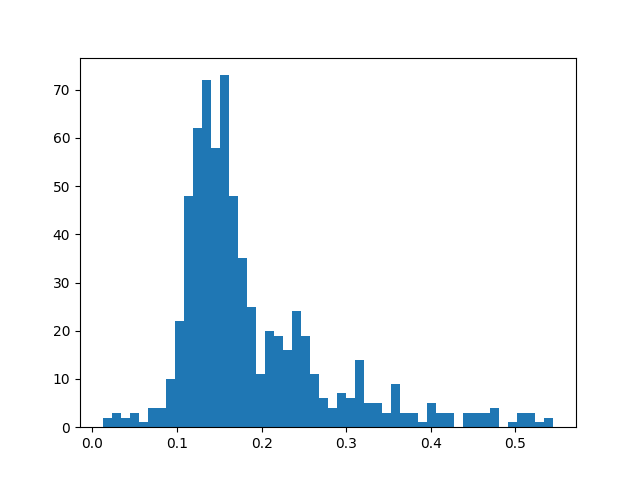

(array([ 2.,  3.,  2.,  3.,  1.,  4.,  4., 10., 22., 48., 62., 72., 58.,
        73., 48., 35., 25., 11., 20., 19., 16., 24., 19., 11.,  6.,  4.,
         7.,  6., 14.,  5.,  5.,  3.,  9.,  3.,  3.,  1.,  5.,  3.,  3.,
         0.,  3.,  3.,  3.,  4.,  0.,  1.,  3.,  3.,  1.,  2.]),
 array([0.012  , 0.02266, 0.03332, 0.04398, 0.05464, 0.0653 , 0.07596,
        0.08662, 0.09728, 0.10794, 0.1186 , 0.12926, 0.13992, 0.15058,
        0.16124, 0.1719 , 0.18256, 0.19322, 0.20388, 0.21454, 0.2252 ,
        0.23586, 0.24652, 0.25718, 0.26784, 0.2785 , 0.28916, 0.29982,
        0.31048, 0.32114, 0.3318 , 0.34246, 0.35312, 0.36378, 0.37444,
        0.3851 , 0.39576, 0.40642, 0.41708, 0.42774, 0.4384 , 0.44906,
        0.45972, 0.47038, 0.48104, 0.4917 , 0.50236, 0.51302, 0.52368,
        0.53434, 0.545  ]),
 <a list of 50 Patch objects>)

In [33]:
plt.figure()
plt.hist(rt, bins=50)

<IPython.core.display.Javascript object>


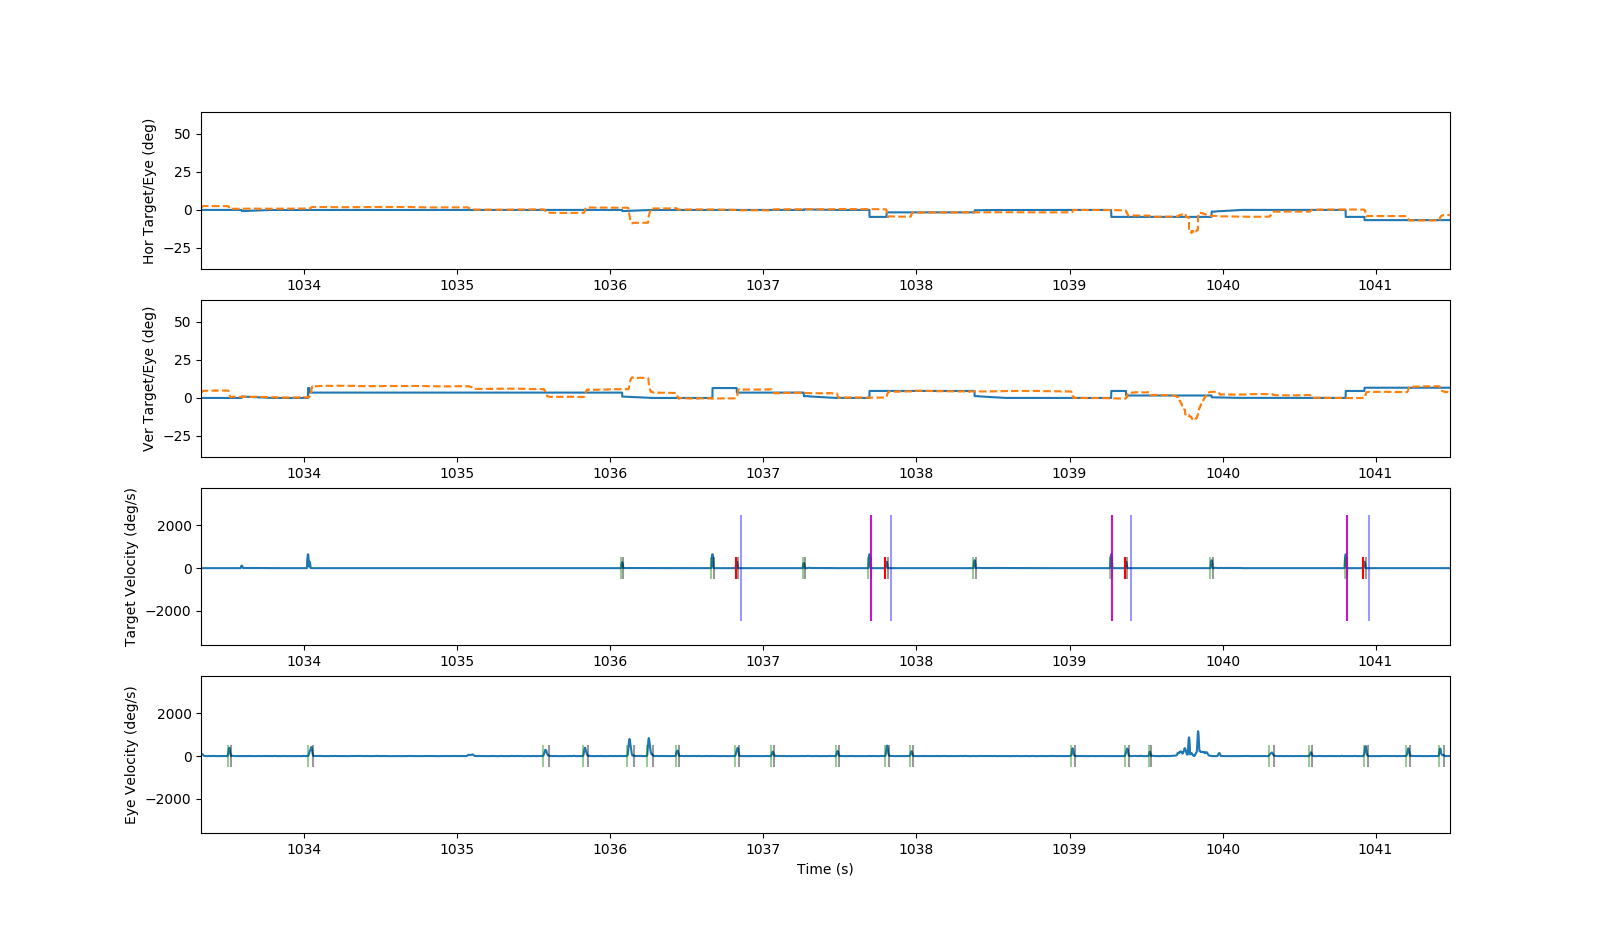

In [34]:
import gc
gc.collect()

plt.figure()
ax1 = plt.subplot(411)
plt.plot(t_HT, HT)
plt.plot(t_HT, HE, '--')
h = plt.ylabel('Hor Target/Eye (deg)')
# h.set_rotation(-45)
plt.subplot(412, sharex=ax1, sharey=ax1)
plt.plot(t_VT, VT)
plt.plot(t_VT, VE, '--')
plt.ylabel('Ver Target/Eye (deg)')
ax3 = plt.subplot(413, sharex=ax1)
plt.plot(t_VT, T_v_filtered)
plt.ylabel('Target Velocity (deg/s)')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(t_VT[mysess.target_onsets],linelengths=1000, colors='g', zorder=10, alpha = 0.4)
plt.eventplot(t_VT[mysess.target_onsets[iss_targets_successful_trials]],linelengths=1000, colors='r', zorder=10, alpha = 1)
plt.eventplot(t_VT[mysess.target_offsets],linelengths=1000, colors='k', zorder=10, alpha = 0.4)
plt.eventplot(mysess.target_offset_times[non_iss_target_jumps_with_successfull_following_iss_tj],linelengths=5000, colors='m', zorder=10, alpha = 0.9)
plt.eventplot(deliver_reward_times,linelengths=5000, colors='b', zorder=10, alpha = 0.4)

ax4 = plt.subplot(414, sharex=ax1, sharey=ax3)
plt.plot(t_VE, E_v_filtered)
plt.ylabel('Eye Velocity (deg/s)')
plt.xlabel('Time (s)')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(t_VE[mysess.saccade_onsets],linelengths=1000, colors='g', zorder=10, alpha = 0.4)
plt.eventplot(t_VE[mysess.saccade_offsets],linelengths=1000, colors='k', zorder=10, alpha = 0.4)


plt.show()


In [20]:
import csv
with open(f_name_csv, 'r') as csv_f:
    reader = csv.reader(csv_f)
    cs_indices = np.squeeze(np.array(list(reader), dtype=np.int64))

In [21]:
def get_bin_cs_counts(cs_range, event_times, bin_ind, error_dir_bin_numbers, cs_times):
    '''
    get cs_counts for each bin
    '''
#     cs_range = pq.quantity.Quantity(cs_range, 's')
    bin_cs_counts = []
    bin_cs_prob = []
    bin_size = []
    for ebn in error_dir_bin_numbers:
        bin_times = event_times[bin_ind == ebn]
        cs_count = 0
        if bin_times.size != 0:
            for bt in bin_times:
                cs_count = cs_count + np.count_nonzero(np.where(np.logical_and(cs_times < bt+cs_range, cs_times > bt )))
            cs_prob = cs_count*1.0/bin_times.size
            bin_cs_prob.append(cs_prob)
            bin_cs_counts.append(cs_count)
            bin_size.append(bin_times.size)
        else:
            bin_cs_counts.append(0)
            bin_cs_prob.append(0)
            bin_size.append(0)
        
    bin_cs_counts = np.array(bin_cs_counts)
    bin_cs_prob = np.array(bin_cs_prob)
    bin_size = np.array(bin_size)
#     bin_cs_counts = bin_cs_counts*1.0/np.sum(bin_cs_counts)
    return (bin_cs_counts, bin_cs_prob, bin_size)

In [22]:
bin_edges = [np.percentile(rt,q) for q in [25, 50, 75]]
bin_ind_sac_delays = np.digitize(rt, bins = bin_edges)

In [23]:
cs_times = voltage_t[cs_indices]

In [24]:
(cs_counts_on, cs_probs_on, bin_sizes_on) = get_bin_cs_counts(0.200, rt_toffs, bin_ind_sac_delays, np.unique(bin_ind_sac_delays), cs_times)

<IPython.core.display.Javascript object>


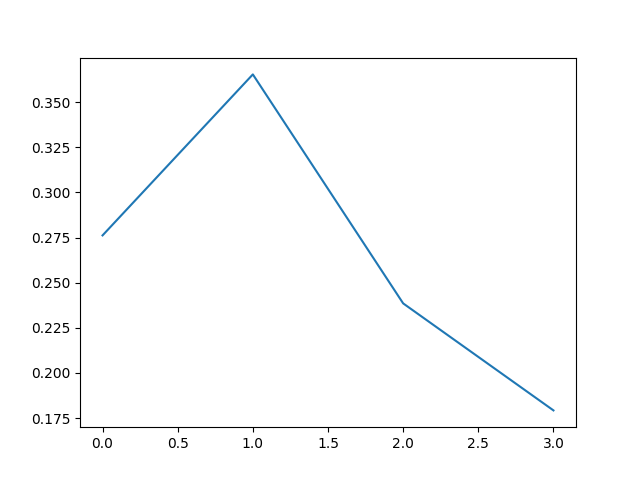

In [25]:
plt.figure()
plt.plot(cs_probs_on)

In [35]:
# saving mysess
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle

output_fn = fname_behavioral + '.session.pkl'
with open(output_fn, 'wb') as output:
    print('writing {} ...'.format(output_fn))
    pickle.dump(mysess, output, pickle.HIGHEST_PROTOCOL)


writing ../data/behavioral/2019_09_12/random_corrective_saccades_with_pause_170006.fhd.session.pkl ...


0.0

In [36]:
from scipy.io import savemat
output_fn = fname_behavioral + '.session.mat'
savemat(output_fn, {'iss_targets' : iss_targets,
'non_iss_target_jumps' : non_iss_target_jumps,
'iss_targets_successful_trials' : iss_targets_successful_trials,
'non_iss_target_jumps_with_successfull_following_iss_tj' : non_iss_target_jumps_with_successfull_following_iss_tj,
'non_iss_target_jumps_with_following_iss_tj' : non_iss_target_jumps_with_following_iss_tj})
print('writing {} ...'.format(output_fn))


writing ../data/behavioral/2019_09_12/random_corrective_saccades_with_pause_170006.fhd.session.mat ...
